# 1D Wave Equation

In this notebook, we will implement **Centered Time Centered Space** (CTCS) finite difference approximations to solve the 1D, second order hyperbolic partial differential equation, or the wave equation:

$$ \frac{\partial^{2}\eta}{\partial t^{2}} = C^{2}\frac{\partial^{2}\eta}{\partial x^{2}} $$

where $\eta$ is a tracer, such as temperature, salinity, dye concentration and $C$ is the phase speed of the disturbance. Here, we assume $C$ is a constant.

***

In [55]:
import numpy as np
import matplotlib.pyplot as plt

First, define the solution space and parameters.

In [56]:
# dimensions of the solution space and spatial discretization
L = 50
n = 199
dx = L/(n+1)
x = np.arange(dx,L,dx)

# temporal discretization
T = 80 # seconds
m = 800
dt = T/m
t0 = 0

# wave phase speed
c = 2
s = c**2*(dt**2)/(dx**2)

# boundary and initial conditions
h0 = 0
hend = 0 
G = np.zeros([n, 1])
amp = 1
x0 = 25
sigma = 2
eta0 = amp*np.exp(-((x-x0)**2/(2*sigma**2)))

Text(0, 0.5, 'eta')

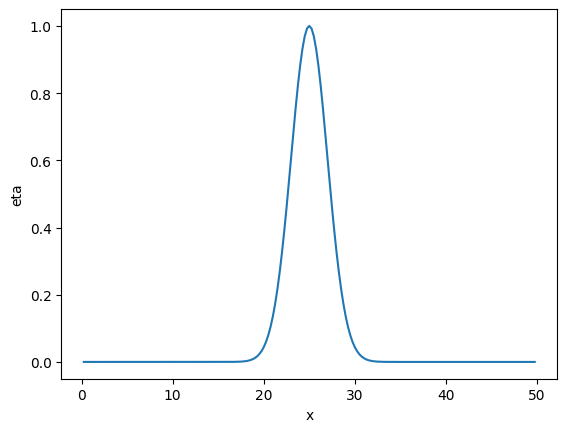

In [57]:
fig, ax = plt.subplots(1)
ax.plot(x, eta0)
ax.set_xlabel('x')
ax.set_ylabel('eta')

Initialize the matrices along with imposing the boundary conditions.

In [58]:
# initialize matrices
A = np.zeros((n,n))
B = np.zeros((n, 1))
D = np.zeros((n, 1))

for i in range(n):
    if i == 0:
        A[i, i] = 2*(1-s)
        A[i, i+1] = s
        B[i, 0] = s*h0
        D[i, 0] = 2*G[i, 0]*dt
    elif i == n-1:
        A[i, i-1] = s
        A[i, i] = 2*(1-s)
        B[i, 0] = s*hend
        D[i, 0] = 2*G[i, 0]*dt
    else:
        A[i, i] = 2*(1-s)
        A[i, i-1] = s
        A[i, i+1] = s
        D[i, 0] = 2*G[i, 0]*dt

Initialize solution matrices.

In [59]:
eta = np.zeros((m,n))
eta[0, :] = eta0
t = np.zeros((m))
t[0] = t0

Finally, march forward in time, solving a unique implementation for time step 1, when Centered Time Centered Space requires $\eta^{t=-1}$, which we use initial conditions to handle.

In [60]:
for i in range(m-1):
    if i == 0:
        eta_n = 0.5*np.matmul(A, eta0[:, np.newaxis]) + 0.5*B + D
    else:
        eta_n = np.matmul(A, eta0[:, np.newaxis]) + B - eta[i-1, :][:, np.newaxis]
    eta[i+1, :] = eta_n.flatten()
    eta0 = eta_n.flatten()
    t[i+1] = t[i] + dt  


Text(0.5, 1.0, 'Plucked string wave propagation')

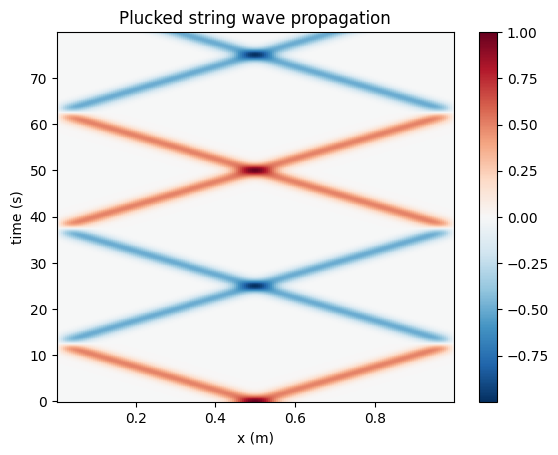

In [64]:
fig, ax = plt.subplots(1)
pcm = ax.pcolormesh(x/L, t.T, eta, cmap='RdBu_r')
ax.set_xlabel('x (m)')
ax.set_ylabel('time (s)')
plt.colorbar(pcm)
ax.set_title('Plucked string wave propagation')

Let's compare our numerical approximation to the analytical solution. We require boundary and initial conditions for the analytical solution, which we reproduce below.

Text(0.5, 1.0, 'Analytical Solution - plucked string wave propagation')

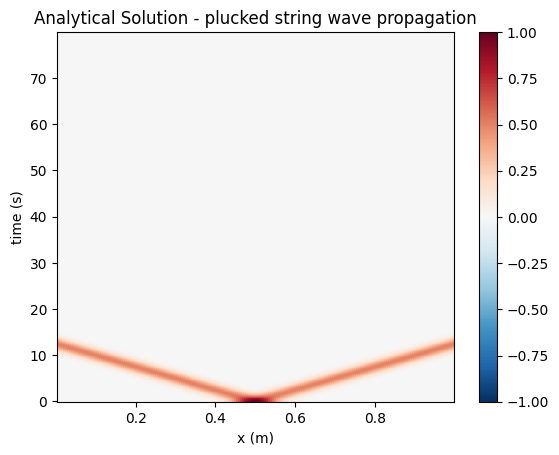

In [71]:
# boundary and initial conditions
h0 = 0
hend = 0 
G = np.zeros([n, 1])
amp = 1
x0 = 25
sigma = 2
eta0 = amp*np.exp(-((x-x0)**2/(2*sigma**2)))

c = 2

# analytical solution
F = np.zeros((m,n))
F[0, :] = 0.5*eta0
H = np.zeros((m,n))
H[0, :] = 0.5*eta0
t_ana = np.zeros((m))
t_ana[0] = t0

for i in range(m-1):
    t_ana[i+1] = t_ana[i] + dt  
    F[i+1, :] = 0.5*amp*np.exp(-((x+c*t_ana[i+1]-x0)**2/(2*sigma**2)))
    H[i+1, :] = 0.5*amp*np.exp(-((x-c*t_ana[i+1]-x0)**2/(2*sigma**2)))
    
eta_ana = F+H

fig, ax = plt.subplots(1)
pcm = ax.pcolormesh(x/L, t_ana.T, eta_ana, cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xlabel('x (m)')
ax.set_ylabel('time (s)')
plt.colorbar(pcm)
ax.set_title('Analytical Solution - plucked string wave propagation')

The differences between the solutions are quite small, but nonzero!

Text(0.5, 1.0, 'Numerical Approximation - Analytical Solution')

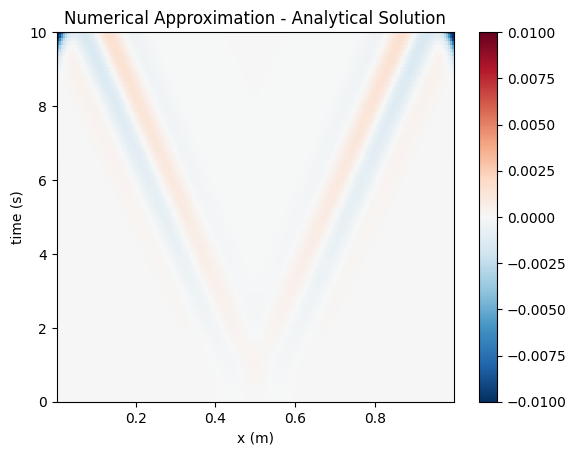

In [76]:
fig, ax = plt.subplots(1)
pcm = ax.pcolormesh(x/L, t_ana.T, eta-eta_ana, cmap='RdBu_r', vmin=-0.01, vmax=0.01)
ax.set_xlabel('x (m)')
ax.set_ylabel('time (s)')
ax.set_ylim([0, 10])
plt.colorbar(pcm)
ax.set_title('Numerical Approximation - Analytical Solution')